# Housing Analysis - Maching Learning 2 Assignment

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. Company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
Following needs to be determined:
- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house
- Determine the optimal value of lambda for ridge and lasso regression

#### Business Goal
Requirement is to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

---
## Data Understanding, Preparation and EDA

#### Addressing missing values

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [309]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [310]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [311]:
# Read the given CSV file, and view some sample records

data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's inspect the various aspects of our dataframe

In [312]:
# shape
data.shape

(1460, 81)

In [313]:
# null values
data[data.columns[data.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

As evident, 19 columns have null values. Out of 19, 5 columns have missing values for more than 50% of data. Column `FireplaceQu` also has 47% missing data.
We will drop the following columns due to the number of missing values: `Alley`, `PoolQC`, `Fence`, `MiscFeature`.
We will also drop column `Id` as it indicates the record count.

In [314]:
data = data.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id'])

In [315]:
# Let's check other columns with missing values
data['LotFrontage'].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

`LotFrontage` column has `NA` as the value for certain rows. We can change the `NA` value to `0`.

In [316]:
data['LotFrontage'] = data['LotFrontage'].fillna(0)

In [317]:
data['LotFrontage'].isna().sum()

0

In [318]:
data['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

`MasVnrType` column has value of `None` for 864 rows which is being considered as null value. We will change the value of `None` to `No`. Also, rows where this column value is `NA` can also be changed to `No`. Similarily, `MasVnrArea` value will be changed to `0` for `NA` values.

In [319]:
data['MasVnrType'] = data['MasVnrType'].fillna('No')

In [320]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [321]:
# null values
data[data.columns[data.isnull().any()]].isnull().sum()

BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

For `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2` have 37 column values missing. For `BsmtExposure` and `BsmtFinType2` there is 1 extra row missing. We can change the value of `NA` to `NB` indicating `No Basement`. 1 extra row which is missing can be dropped from the dataset considering it as an anamoly.

In [322]:
data = data.drop(data[(data['BsmtQual'] == 'Gd') & (data['BsmtExposure'].isna())].index)

In [323]:
data = data.drop(data[(data['BsmtQual'] == 'Gd') & (data['BsmtFinType2'].isna())].index)

In [324]:
data['BsmtQual'] = data['BsmtQual'].fillna('NB')
data['BsmtCond'] = data['BsmtCond'].fillna('NB')
data['BsmtExposure'] = data['BsmtExposure'].fillna('NB')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('NB')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('NB')

In [325]:
data.shape
# null values
data[data.columns[data.isnull().any()]].isnull().sum()

Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

For `Electrical` column there is only one row having missing value. We can drop this row from the dataset.

In [326]:
data = data.drop(data[(data['Electrical'].isna())].index)

For `FireplaceQu` column, there are 690 rows with `NA` corresponding to `No Fireplace`, we can change the value from `NA` to `NF`.

In [327]:
data['FireplaceQu'] = data['FireplaceQu'].fillna('NF')

For `GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual` and `GarageCond` all 81 rows with missing values. They are all same rows where there is `No Garage` for the house. We can change the value `NA` to `NG` for indicating `No Garage` for categorical column. For the `GarageYrBlt` column which is indicating the year in which garage was built can be **dropped** as it might not have much impact on the price of a house.

In [328]:
data['GarageType'] = data['GarageType'].fillna('NG')
data['GarageFinish'] = data['GarageFinish'].fillna('NG')
data['GarageQual'] = data['GarageQual'].fillna('NG')
data['GarageCond'] = data['GarageCond'].fillna('NG')
data = data.drop(columns='GarageYrBlt')

In [329]:
data.shape
# null values
data[data.columns[data.isnull().any()]].isnull().sum()

Series([], dtype: float64)

#### Visualize categorical variables

In [330]:
import matplotlib.pyplot as plt 
import seaborn as sns

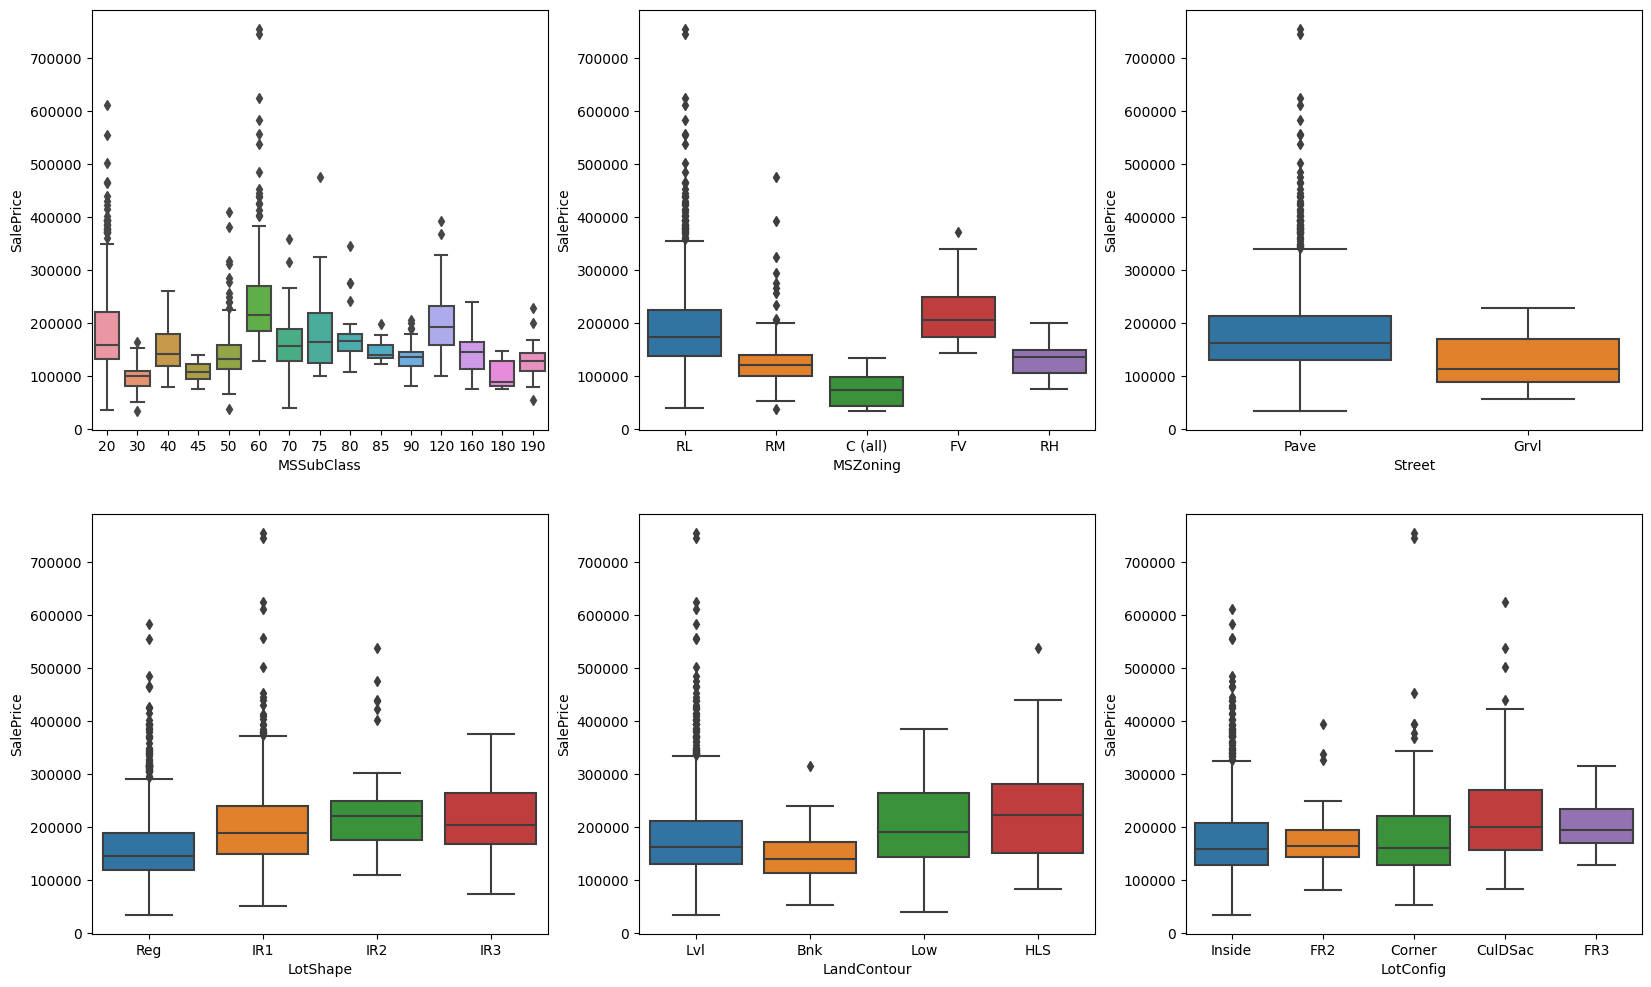

In [331]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'Street', y = 'SalePrice', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = data)
plt.show()

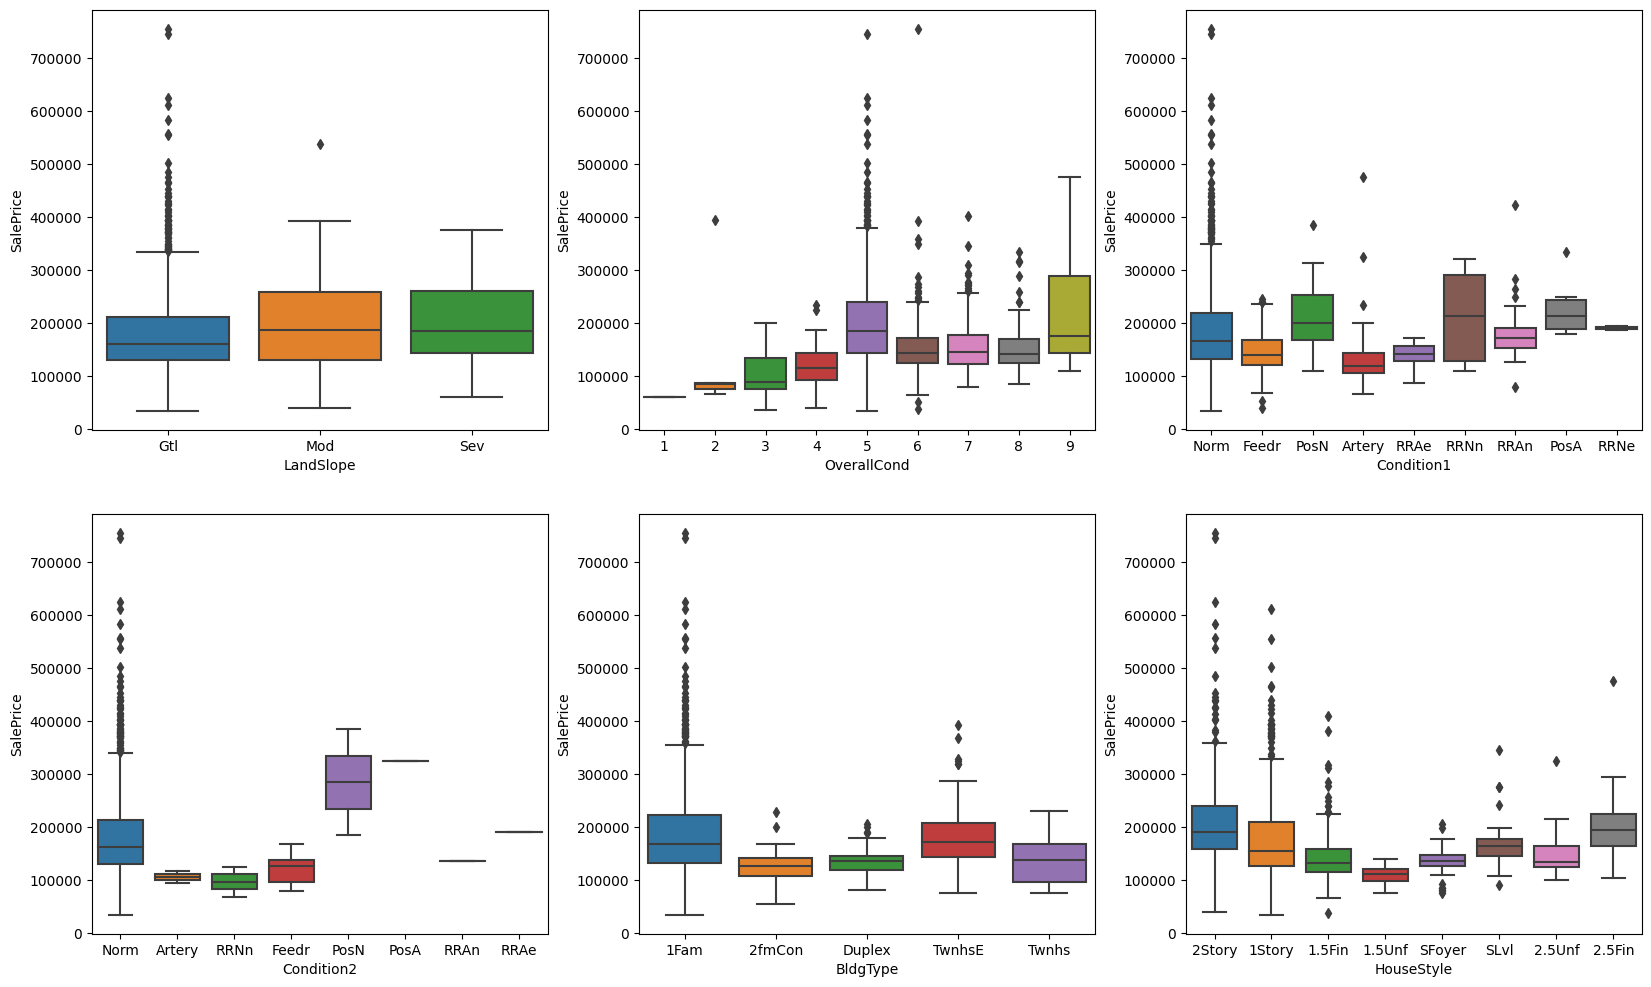

In [332]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = data)
plt.show()

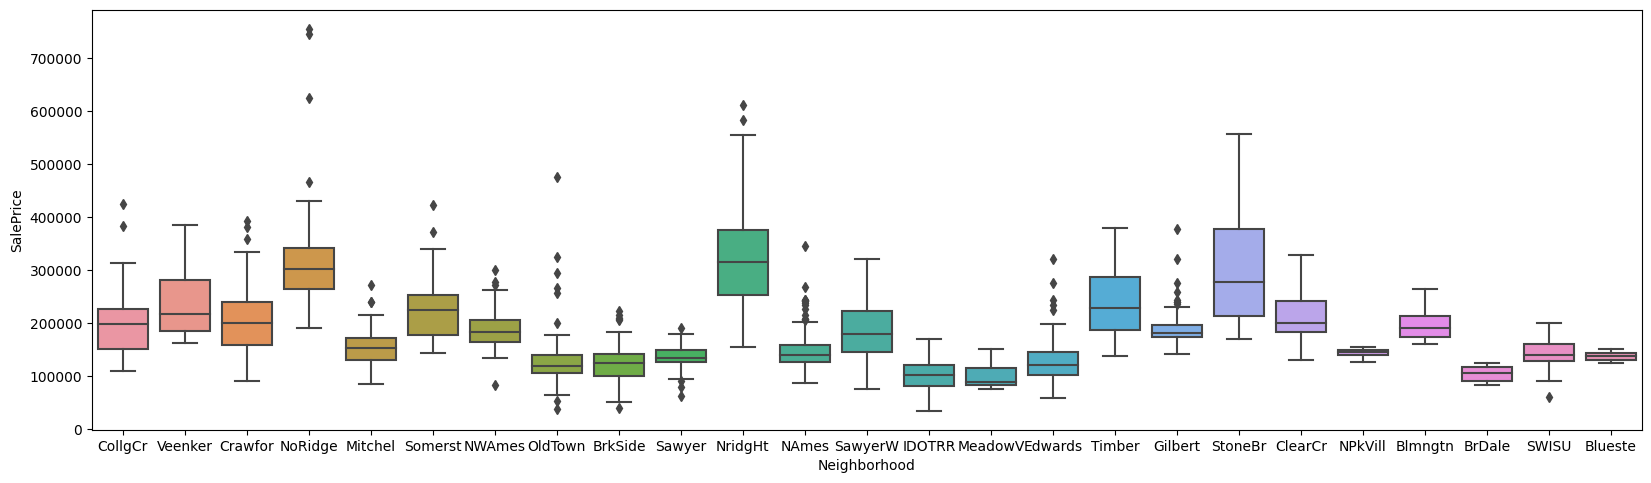

In [333]:
plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = data)
plt.show()

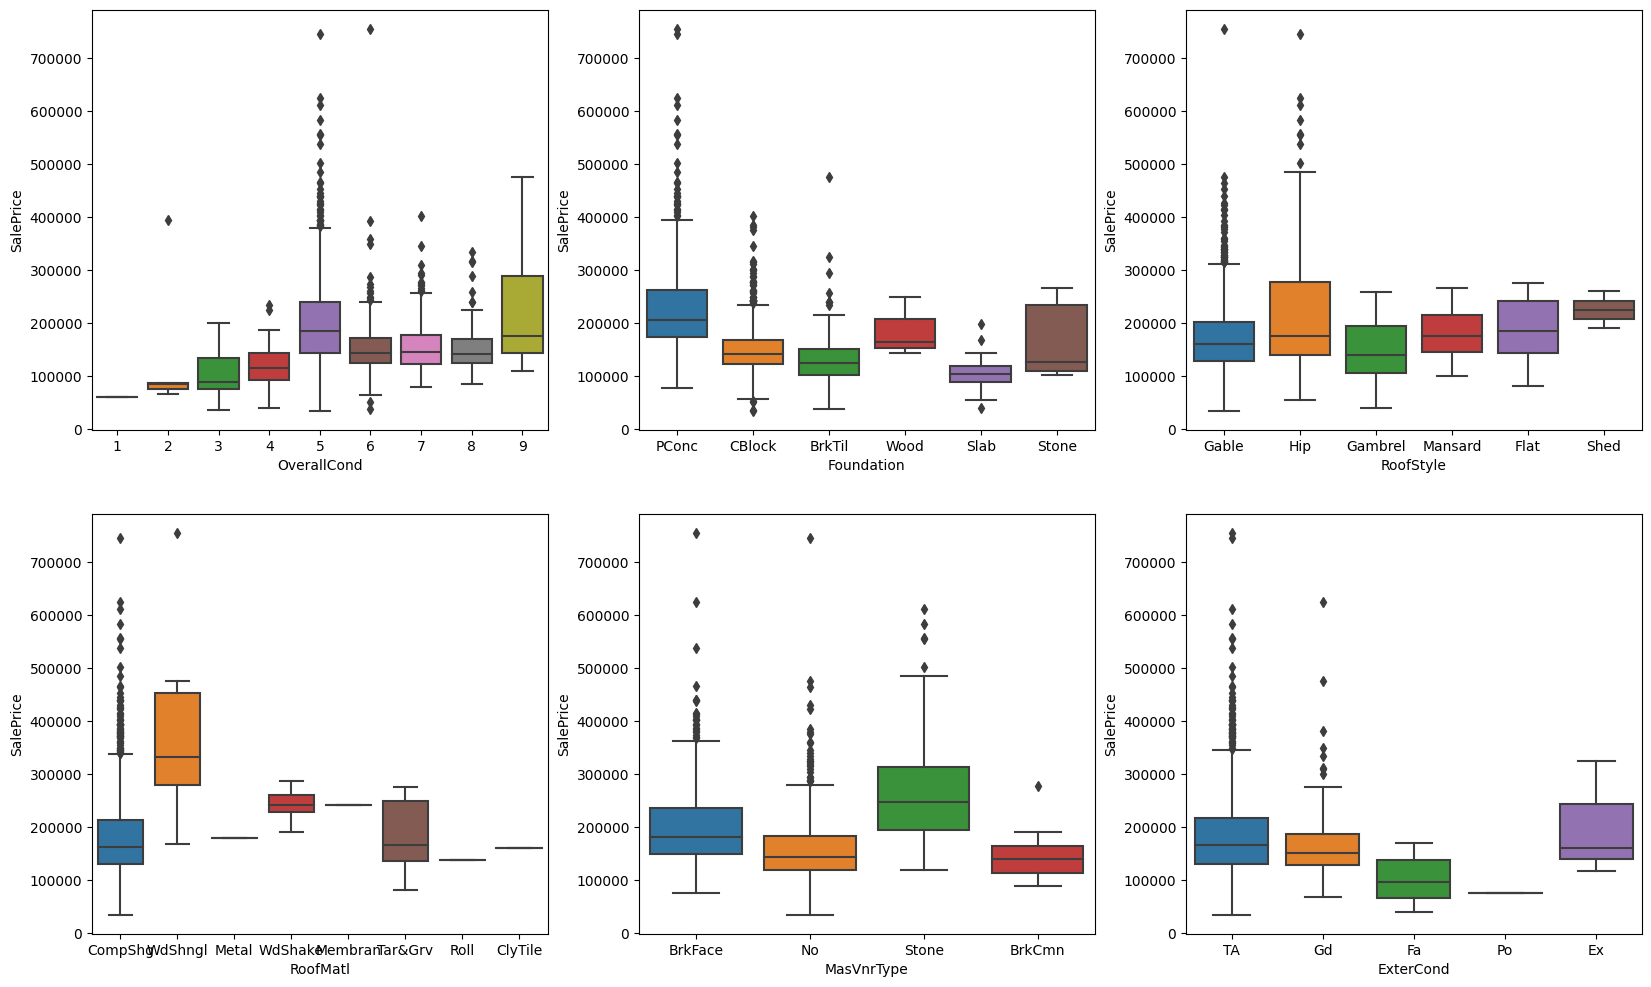

In [334]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = data)
plt.show()

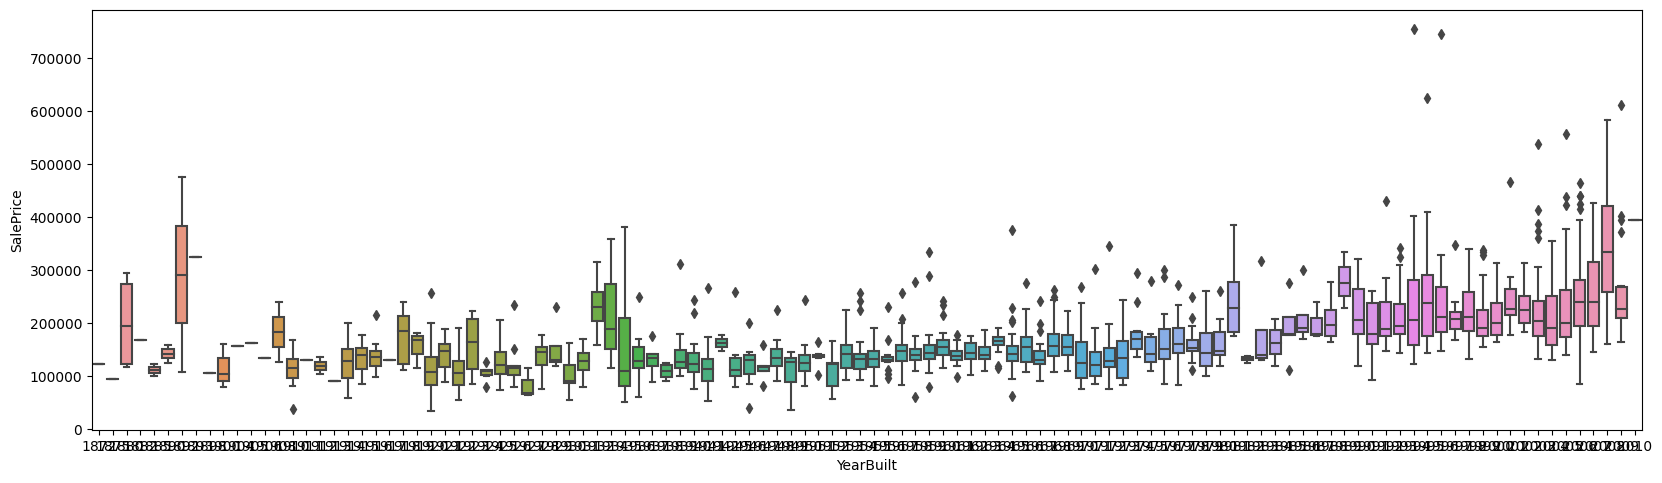

In [335]:
plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = data)
plt.show()

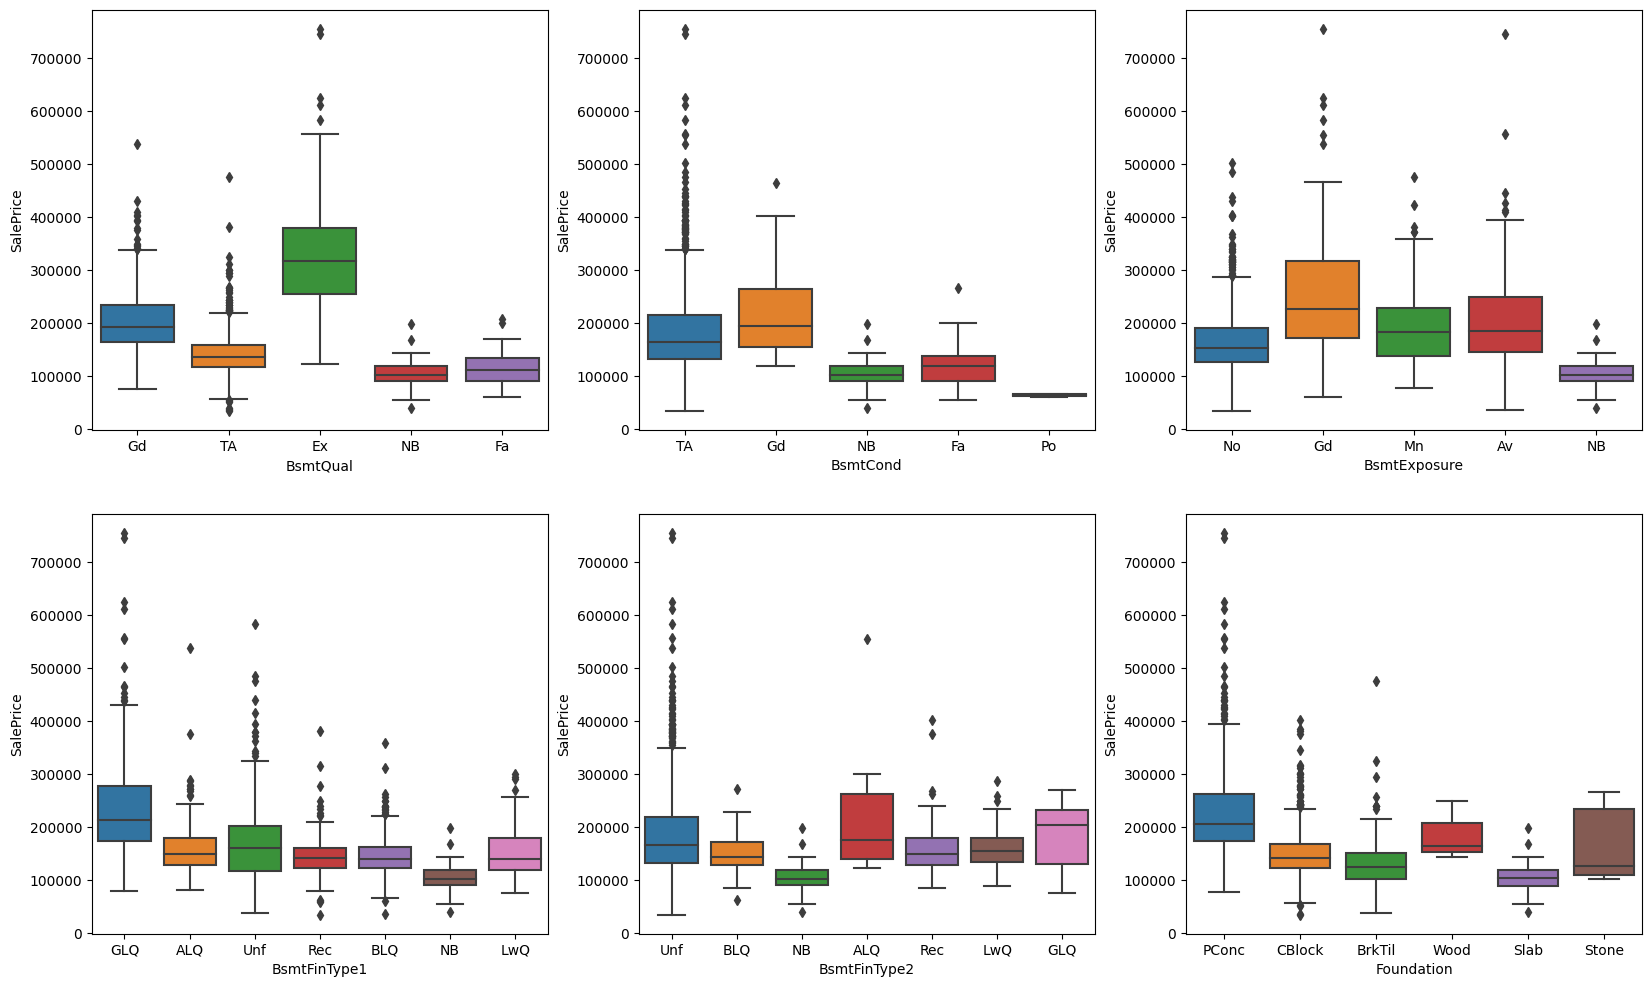

In [336]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = data)
plt.show()

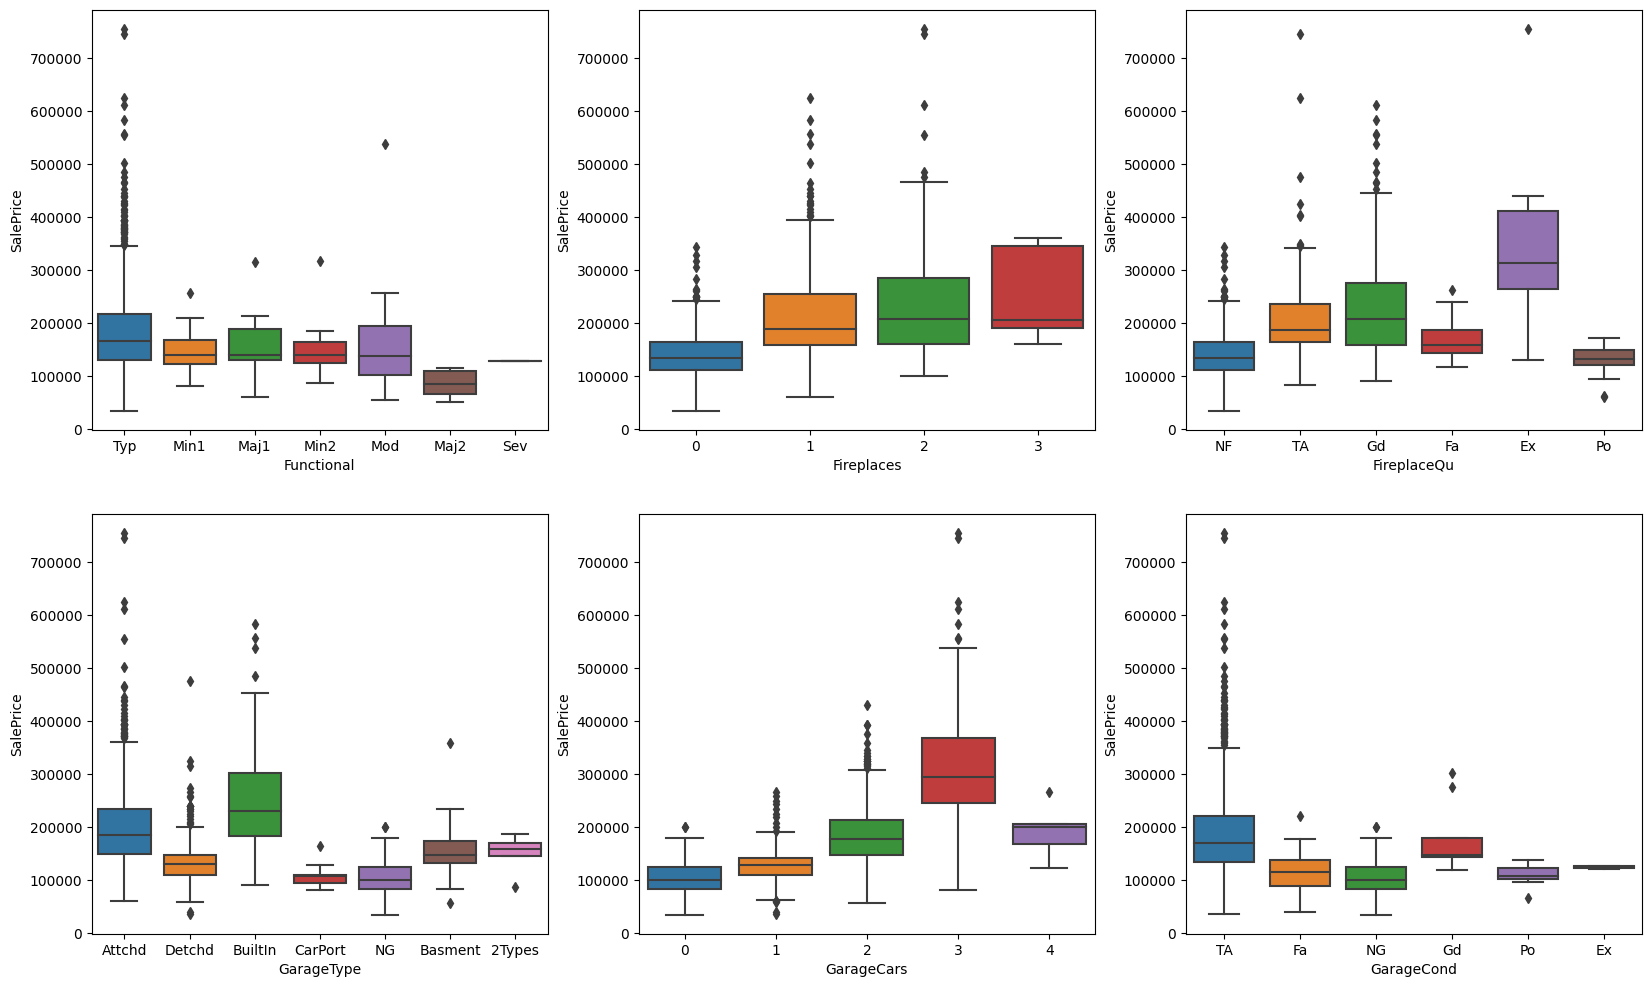

In [337]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'Fireplaces', y = 'SalePrice', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = data)
plt.show()

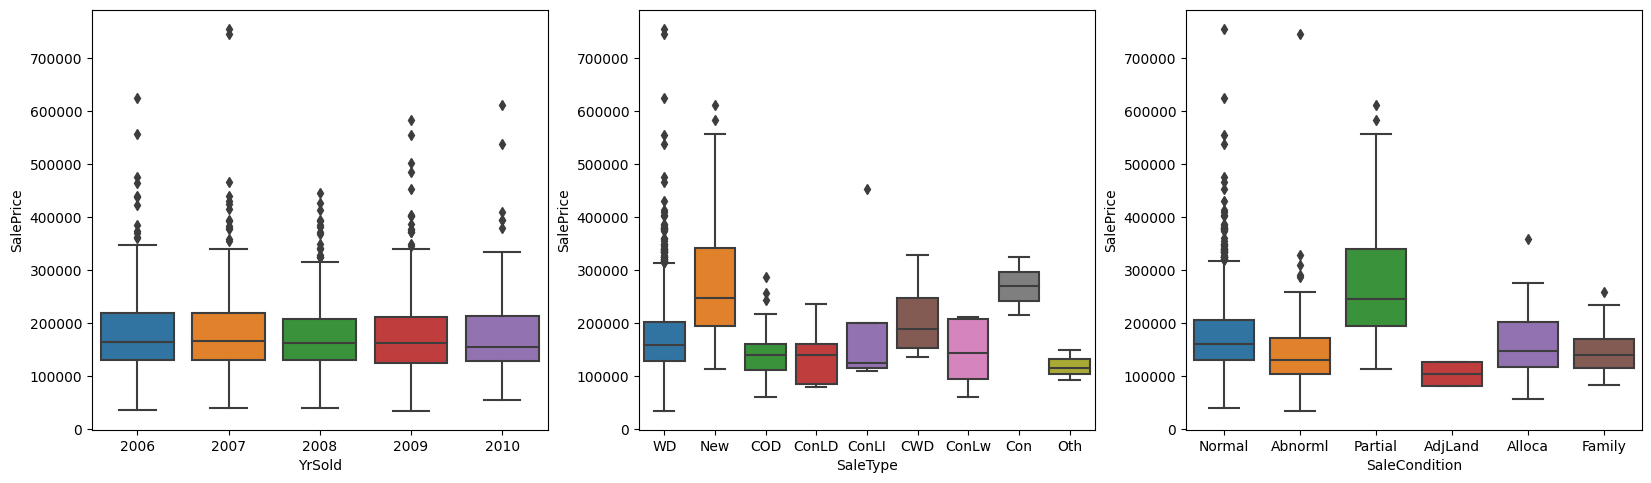

In [338]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'YrSold', y = 'SalePrice', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = data)
plt.show()

#### Visualize continuous variables

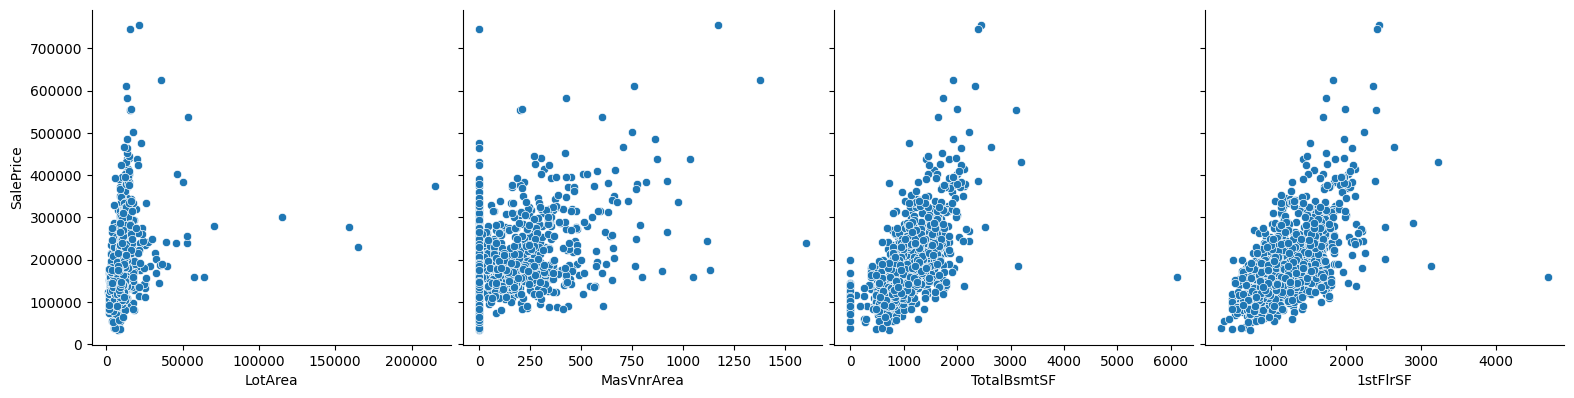

In [339]:
sns.pairplot(data, x_vars=['LotArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

Let's check how many houses are with Lot Area more than or equal to 50000

In [340]:
len(data[data['LotArea'] >= 50000])

11

Let's drop these 11 rows as it will skew our data

In [341]:
data = data[data['LotArea'] < 50000]

#### Creation of dummy variables

**Dummy variables for column `MSSubClass`**

In [342]:
data['MSSubClass'].value_counts()

MSSubClass
20     529
60     295
50     143
120     87
30      69
160     63
70      60
80      57
90      52
190     29
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [343]:
msSubClasses = pd.get_dummies(data['MSSubClass'], dtype=int, prefix='MSSubClass')
msSubClasses.drop(columns='MSSubClass_40', inplace=True)
data = pd.concat([data, msSubClasses], axis = 1)
data.drop('MSSubClass', axis=1, inplace=True)
# msSubClasses

**Dummy variables for column `MSZoning`**

In [344]:
data['MSZoning'].value_counts()

MSZoning
RL         1137
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [345]:
msZonings = pd.get_dummies(data['MSZoning'], dtype=int, prefix='MSZoning', drop_first=True)
data = pd.concat([data, msZonings], axis = 1)
data.drop('MSZoning', axis=1, inplace=True)
#msZonings

**Dummy variables for column `Street`**

In [346]:
data['Street'].value_counts()

Street
Pave    1441
Grvl       5
Name: count, dtype: int64

In [347]:
streets = pd.get_dummies(data['Street'], dtype=int, prefix='Street', drop_first=True)
data = pd.concat([data, streets], axis = 1)
data.drop('Street', axis=1, inplace=True)
# streets

**Dummy variables for column `LotShape`**

In [348]:
data['LotShape'].value_counts()

LotShape
Reg    924
IR1    477
IR2     37
IR3      8
Name: count, dtype: int64

In [349]:
lotShapes = pd.get_dummies(data['LotShape'], dtype=int, prefix='LotShape')
lotShapes.drop(columns='LotShape_IR3', inplace=True)
data = pd.concat([data, lotShapes], axis = 1)
data.drop('LotShape', axis=1, inplace=True)
# lotShapes

**Dummy variables for column `LandContour`**

In [350]:
data['LandContour'].value_counts()

LandContour
Lvl    1308
Bnk      61
HLS      48
Low      29
Name: count, dtype: int64

In [351]:
landContours = pd.get_dummies(data['LandContour'], dtype=int, prefix='LandContour')
landContours.drop(columns='LandContour_Low', inplace=True)
data = pd.concat([data, landContours], axis = 1)
data.drop('LandContour', axis=1, inplace=True)
# landContours

**Dummy variables for column `Utilities`**

In [352]:
data['Utilities'].value_counts()

Utilities
AllPub    1445
NoSeWa       1
Name: count, dtype: int64

There is not much variance in data for `Utilities` column. Only one row has a different value, all other rows have the same value. We will drop this column as it will not have much impact on the target variable.

In [353]:
data.drop(columns='Utilities', inplace=True)

**Dummy variables for column `LotConfig`**

In [354]:
data['LotConfig'].value_counts()

LotConfig
Inside     1045
Corner      260
CulDSac      90
FR2          47
FR3           4
Name: count, dtype: int64

In [355]:
lotConfigs = pd.get_dummies(data['LotConfig'], dtype=int, prefix='LotConfig')
lotConfigs.drop(columns='LotConfig_FR3', inplace=True)
data = pd.concat([data, lotConfigs], axis = 1)
data.drop('LotConfig', axis=1, inplace=True)
# lotConfigs

**Dummy variables for column `LandSlope`**

In [356]:
data['LandSlope'].value_counts()

LandSlope
Gtl    1377
Mod      61
Sev       8
Name: count, dtype: int64

In [357]:
landSlopes = pd.get_dummies(data['LandSlope'], dtype=int, prefix='LandSlope')
landSlopes.drop(columns='LandSlope_Sev', inplace=True)
data = pd.concat([data, landSlopes], axis = 1)
data.drop('LandSlope', axis=1, inplace=True)

**Dummy variables for column `Neighborhood`**

In [358]:
data['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    149
OldTown    113
Edwards     99
Somerst     86
Gilbert     79
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      34
SWISU       25
StoneBr     24
ClearCr     23
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     10
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [359]:
neighborhoods = pd.get_dummies(data['Neighborhood'], dtype=int, prefix='Neighborhood')
neighborhoods.drop(columns='Neighborhood_Blueste', inplace=True)
data = pd.concat([data, neighborhoods], axis = 1)
data.drop('Neighborhood', axis=1, inplace=True)

**Dummy variables for column `Condition1`**

In [360]:
data['Condition1'].value_counts()

Condition1
Norm      1248
Feedr       79
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [361]:
condition1s = pd.get_dummies(data['Condition1'], dtype=int, prefix='Condition1')
condition1s.drop(columns='Condition1_RRNe', inplace=True)
data = pd.concat([data, condition1s], axis = 1)
data.drop('Condition1', axis=1, inplace=True)

**Dummy variables for column `Condition2`**

In [362]:
data['Condition2'].value_counts()

Condition2
Norm      1431
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

In [363]:
condition2s = pd.get_dummies(data['Condition2'], dtype=int, prefix='Condition2')
condition2s.drop(columns='Condition2_RRAe', inplace=True)
data = pd.concat([data, condition2s], axis = 1)
data.drop('Condition2', axis=1, inplace=True)

**Dummy variables for column `BldgType`**

In [364]:
data['BldgType'].value_counts()

BldgType
1Fam      1207
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      30
Name: count, dtype: int64

In [365]:
bldgTypes = pd.get_dummies(data['BldgType'], dtype=int, prefix='BldgType')
bldgTypes.drop(columns='BldgType_2fmCon', inplace=True)
data = pd.concat([data, bldgTypes], axis = 1)
data.drop('BldgType', axis=1, inplace=True)

**Dummy variables for column `HouseStyle`**

In [366]:
data['HouseStyle'].value_counts()

HouseStyle
1Story    719
2Story    441
1.5Fin    152
SLvl       64
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

In [367]:
houseStyles = pd.get_dummies(data['HouseStyle'], dtype=int, prefix='HouseStyle')
houseStyles.drop(columns='HouseStyle_2.5Fin', inplace=True)
data = pd.concat([data, houseStyles], axis = 1)
data.drop('HouseStyle', axis=1, inplace=True)

**Dummy variables for column `OverallQual`**

In [368]:
data['OverallQual'].value_counts()

OverallQual
5     394
6     372
7     315
8     166
4     115
9      42
3      20
10     17
2       3
1       2
Name: count, dtype: int64

In [369]:
overallQuals = pd.get_dummies(data['OverallQual'], dtype=int, prefix='OverallQual')
overallQuals.rename(columns={'OverallQual_1':'OverallQual_VPoor', 'OverallQual_2': 'OverallQual_Poor', 'OverallQual_3': 'OverallQual_Fair', 'OverallQual_4': 'OverallQual_BAvg', 'OverallQual_5': 'OverallQual_Avg', 'OverallQual_6': 'OverallQual_AAvg', 'OverallQual_7': 'OverallQual_Good', 'OverallQual_8': 'OverallQual_VGood', 'OverallQual_9': 'OverallQual_Excel', 'OverallQual_10': 'OverallQual_VExcel'}, inplace=True)
overallQuals.drop(columns='OverallQual_VPoor', inplace=True)
data = pd.concat([data, overallQuals], axis = 1)
data.drop('OverallQual', axis=1, inplace=True)

**Dummy variables for column `OverallCond`**

In [370]:
data['OverallCond'].value_counts()

OverallCond
5    810
6    250
7    204
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

In [371]:
overallConds = pd.get_dummies(data['OverallCond'], dtype=int, prefix='OverallCond')
overallConds.rename(columns={'OverallCond_1':'OverallCond_VPoor', 'OverallCond_2': 'OverallCond_Poor', 'OverallCond_3': 'OverallCond_Fair', 'OverallCond_4': 'OverallCond_BAvg', 'OverallCond_5': 'OverallCond_Avg', 'OverallCond_6': 'OverallCond_AAvg', 'OverallCond_7': 'OverallCond_Good', 'OverallCond_8': 'OverallCond_VGood', 'OverallCond_9': 'OverallCond_Excel'}, inplace=True)
overallConds.drop(columns='OverallCond_VPoor', inplace=True)
data = pd.concat([data, overallConds], axis = 1)
data.drop('OverallCond', axis=1, inplace=True)

**Dummy variables for column `YearBuilt`**

In [372]:
data['YearBuilt'].value_counts()

YearBuilt
2006    66
2005    64
2004    54
2007    49
2003    43
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: count, Length: 112, dtype: int64

In [373]:
yearBuilts = pd.get_dummies(data['YearBuilt'], dtype=int, prefix='YearBuilt')
yearBuilts.drop(columns='YearBuilt_1905', inplace=True)
data = pd.concat([data, yearBuilts], axis = 1)
data.drop('YearBuilt', axis=1, inplace=True)

**Dropping column `YearRemodAdd`**

In [374]:
data.drop(columns='YearRemodAdd', inplace=True)

**Dummy variables for column `RoofStyle`**

In [375]:
data['RoofStyle'].value_counts()

RoofStyle
Gable      1131
Hip         283
Flat         12
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

In [376]:
roofStyles = pd.get_dummies(data['RoofStyle'], dtype=int, prefix='RoofStyle')
roofStyles.drop(columns='RoofStyle_Shed', inplace=True)
data = pd.concat([data, roofStyles], axis = 1)
data.drop('RoofStyle', axis=1, inplace=True)

**Dummy variables for column `RoofMatl`**

In [377]:
data['RoofMatl'].value_counts()

RoofMatl
CompShg    1424
Tar&Grv      10
WdShake       5
WdShngl       4
Metal         1
Membran       1
Roll          1
Name: count, dtype: int64

Only 22 rows have different Root Material compared to `CompShg`. This column can be dropped as it will not have much impact on the overall outcome.

In [378]:
data.drop(columns='RoofMatl', inplace=True)

**Dummy variables for column `Exterior1st`**

In [379]:
data['Exterior1st'].value_counts()

Exterior1st
VinylSd    512
HdBoard    221
MetalSd    220
Wd Sdng    204
Plywood    104
CemntBd     60
BrkFace     49
WdShing     25
Stucco      24
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

In [380]:
exterior1sts = pd.get_dummies(data['Exterior1st'], dtype=int, prefix='Exterior1st')
exterior1sts.drop(columns='Exterior1st_CBlock', inplace=True)
data = pd.concat([data, exterior1sts], axis = 1)
data.drop('Exterior1st', axis=1, inplace=True)

**Dropping column `Exterior2nd`**

In [381]:
data.drop(columns='Exterior2nd', inplace=True)

**Dummy variables for column `MasVnrType`**

In [382]:
data['MasVnrType'].value_counts()

MasVnrType
No         864
BrkFace    442
Stone      126
BrkCmn      14
Name: count, dtype: int64

In [383]:
masVnrTypes = pd.get_dummies(data['MasVnrType'], dtype=int, prefix='MasVnrType')
masVnrTypes.drop(columns='MasVnrType_BrkCmn', inplace=True)
data = pd.concat([data, masVnrTypes], axis = 1)
data.drop('MasVnrType', axis=1, inplace=True)

**Dummy variables for column `ExterQual`**

In [384]:
data['ExterQual'].value_counts()

ExterQual
TA    899
Gd    483
Ex     50
Fa     14
Name: count, dtype: int64

In [385]:
exterQuals = pd.get_dummies(data['ExterQual'], dtype=int, prefix='ExterQual')
exterQuals.drop(columns='ExterQual_Fa', inplace=True)
data = pd.concat([data, exterQuals], axis = 1)
data.drop('ExterQual', axis=1, inplace=True)

**Dummy variables for column `ExterCond`**

In [386]:
data['ExterCond'].value_counts()

ExterCond
TA    1268
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

In [387]:
exterConds = pd.get_dummies(data['ExterCond'], dtype=int, prefix='ExterCond')
exterConds.drop(columns='ExterCond_Po', inplace=True)
data = pd.concat([data, exterConds], axis = 1)
data.drop('ExterCond', axis=1, inplace=True)

**Dummy variables for column `Foundation`**

In [388]:
data['Foundation'].value_counts()

Foundation
PConc     641
CBlock    626
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

In [389]:
foundations = pd.get_dummies(data['Foundation'], dtype=int, prefix='Foundation')
foundations.drop(columns='Foundation_Wood', inplace=True)
data = pd.concat([data, foundations], axis = 1)
data.drop('Foundation', axis=1, inplace=True)

**Dummy variables for column `BsmtQual`**

In [390]:
data['BsmtQual'].value_counts()

BsmtQual
TA    647
Gd    608
Ex    119
NB     37
Fa     35
Name: count, dtype: int64

In [391]:
bsmtQuals = pd.get_dummies(data['BsmtQual'], dtype=int, prefix='BsmtQual')
bsmtQuals.drop(columns='BsmtQual_Fa', inplace=True)
data = pd.concat([data, bsmtQuals], axis = 1)
data.drop('BsmtQual', axis=1, inplace=True)

**Dummy variables for column `BsmtCond`**

In [392]:
data['BsmtCond'].value_counts()

BsmtCond
TA    1297
Gd      65
Fa      45
NB      37
Po       2
Name: count, dtype: int64

In [393]:
bsmtConds = pd.get_dummies(data['BsmtCond'], dtype=int, prefix='BsmtCond')
bsmtConds.drop(columns='BsmtCond_Po', inplace=True)
data = pd.concat([data, bsmtConds], axis = 1)
data.drop('BsmtCond', axis=1, inplace=True)

**Dummy variables for column `BsmtExposure`**

In [394]:
data['BsmtExposure'].value_counts()

BsmtExposure
No    951
Av    219
Gd    125
Mn    114
NB     37
Name: count, dtype: int64

In [395]:
bsmtExposures = pd.get_dummies(data['BsmtExposure'], dtype=int, prefix='BsmtExposure')
bsmtExposures.drop(columns='BsmtExposure_NB', inplace=True)
data = pd.concat([data, bsmtExposures], axis = 1)
data.drop('BsmtExposure', axis=1, inplace=True)

**Dummy variables for column `BsmtFinType1`**

In [396]:
data['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    428
GLQ    413
ALQ    216
BLQ    146
Rec    132
LwQ     74
NB      37
Name: count, dtype: int64

In [397]:
bsmtFinType1s = pd.get_dummies(data['BsmtFinType1'], dtype=int, prefix='BsmtFinType1')
bsmtFinType1s.drop(columns='BsmtFinType1_NB', inplace=True)
data = pd.concat([data, bsmtFinType1s], axis = 1)
data.drop('BsmtFinType1', axis=1, inplace=True)

**Dummy variables for column `Heating`**

In [398]:
data['Heating'].value_counts()

Heating
GasA     1415
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

In [399]:
heatings = pd.get_dummies(data['Heating'], dtype=int, prefix='Heating')
heatings.drop(columns='Heating_Floor', inplace=True)
data = pd.concat([data, heatings], axis = 1)
data.drop('Heating', axis=1, inplace=True)

**Dummy variables for column `HeatingQC`**

In [400]:
data['HeatingQC'].value_counts()

HeatingQC
Ex    734
TA    424
Gd    238
Fa     49
Po      1
Name: count, dtype: int64

In [401]:
heatingQCs = pd.get_dummies(data['HeatingQC'], dtype=int, prefix='HeatingQC')
heatingQCs.drop(columns='HeatingQC_Po', inplace=True)
data = pd.concat([data, heatingQCs], axis = 1)
data.drop('HeatingQC', axis=1, inplace=True)

**Dummy variables for column `CentralAir`**

In [402]:
data['CentralAir'].value_counts()

CentralAir
Y    1351
N      95
Name: count, dtype: int64

In [403]:
centralAirs = pd.get_dummies(data['CentralAir'], dtype=int, prefix='CentralAir')
centralAirs.drop(columns='CentralAir_N', inplace=True)
data = pd.concat([data, centralAirs], axis = 1)
data.drop('CentralAir', axis=1, inplace=True)

**Dummy variables for column `Electrical`**

In [404]:
data['Electrical'].value_counts()

Electrical
SBrkr    1321
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [405]:
electricals = pd.get_dummies(data['Electrical'], dtype=int, prefix='Electrical')
electricals.drop(columns='Electrical_Mix', inplace=True)
data = pd.concat([data, electricals], axis = 1)
data.drop('Electrical', axis=1, inplace=True)

**Dummy variables for column `BsmtFullBath`**

In [406]:
data['BsmtFullBath'].value_counts()

BsmtFullBath
0    853
1    581
2     11
3      1
Name: count, dtype: int64

In [407]:
bsmtFullBaths = pd.get_dummies(data['BsmtFullBath'], dtype=int, prefix='BsmtFullBath')
bsmtFullBaths.drop(columns='BsmtFullBath_3', inplace=True)
data = pd.concat([data, bsmtFullBaths], axis = 1)
data.drop('BsmtFullBath', axis=1, inplace=True)

**Dropping column `BsmtHalfBath`**

In [408]:
data.drop(columns='BsmtHalfBath', inplace=True)

**Dummy variables for column `FullBath`**

In [409]:
data['FullBath'].value_counts()

FullBath
2    758
1    648
3     32
0      8
Name: count, dtype: int64

In [410]:
fullBaths = pd.get_dummies(data['FullBath'], dtype=int, prefix='FullBath')
fullBaths.drop(columns='FullBath_0', inplace=True)
data = pd.concat([data, fullBaths], axis = 1)
data.drop('FullBath', axis=1, inplace=True)

**Dummy variables for column `Bedroom`**

In [411]:
data['BedroomAbvGr'].value_counts()

BedroomAbvGr
3    796
2    355
4    211
1     50
5     21
6      7
0      5
8      1
Name: count, dtype: int64

In [412]:
bedroomAbvGrs = pd.get_dummies(data['BedroomAbvGr'], dtype=int, prefix='BedroomAbvGr')
bedroomAbvGrs.drop(columns='BedroomAbvGr_8', inplace=True)
data = pd.concat([data, bedroomAbvGrs], axis = 1)
data.drop('BedroomAbvGr', axis=1, inplace=True)

**Dummy variables for column `KitchenAbvGr`**

In [413]:
data['KitchenAbvGr'].value_counts()

KitchenAbvGr
1    1378
2      65
3       2
0       1
Name: count, dtype: int64

In [414]:
kitchenAbvGrs = pd.get_dummies(data['KitchenAbvGr'], dtype=int, prefix='KitchenAbvGr')
kitchenAbvGrs.drop(columns='KitchenAbvGr_0', inplace=True)
data = pd.concat([data, kitchenAbvGrs], axis = 1)
data.drop('KitchenAbvGr', axis=1, inplace=True)

**Dummy variables for column `KitchenQual`**

In [415]:
data['KitchenQual'].value_counts()

KitchenQual
TA    732
Gd    577
Ex     98
Fa     39
Name: count, dtype: int64

In [416]:
kitchenQuals = pd.get_dummies(data['KitchenQual'], dtype=int, prefix='KitchenQual')
kitchenQuals.drop(columns='KitchenQual_Fa', inplace=True)
data = pd.concat([data, kitchenQuals], axis = 1)
data.drop('KitchenQual', axis=1, inplace=True)

**Dummy variables for column `TotRmsAbvGrd`**

In [417]:
data['TotRmsAbvGrd'].value_counts()

TotRmsAbvGrd
6     401
7     323
5     272
8     186
4      97
9      74
10     47
11     18
3      17
12      9
2       1
14      1
Name: count, dtype: int64

In [418]:
totRmsAbvGrds = pd.get_dummies(data['TotRmsAbvGrd'], dtype=int, prefix='TotRmsAbvGrd')
totRmsAbvGrds.drop(columns='TotRmsAbvGrd_2', inplace=True)
data = pd.concat([data, totRmsAbvGrds], axis = 1)
data.drop('TotRmsAbvGrd', axis=1, inplace=True)

**Dummy variables for column `Fireplaces`**

In [419]:
data['Fireplaces'].value_counts()

Fireplaces
0    689
1    646
2    107
3      4
Name: count, dtype: int64

In [420]:
fireplaces = pd.get_dummies(data['Fireplaces'], dtype=int, prefix='Fireplaces')
fireplaces.drop(columns='Fireplaces_3', inplace=True)
data = pd.concat([data, fireplaces], axis = 1)
data.drop('Fireplaces', axis=1, inplace=True)

**Dummy variables for column `FireplaceQu`**

In [421]:
data['FireplaceQu'].value_counts()

FireplaceQu
NF    689
Gd    373
TA    308
Fa     32
Ex     24
Po     20
Name: count, dtype: int64

In [422]:
fireplaceQus = pd.get_dummies(data['FireplaceQu'], dtype=int, prefix='FireplaceQu')
fireplaceQus.drop(columns='FireplaceQu_Po', inplace=True)
data = pd.concat([data, fireplaceQus], axis = 1)
data.drop('FireplaceQu', axis=1, inplace=True)

**Dummy variables for column `GarageType`**

In [423]:
data['GarageType'].value_counts()

GarageType
Attchd     859
Detchd     386
BuiltIn     86
NG          81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [424]:
garageTypes = pd.get_dummies(data['GarageType'], dtype=int, prefix='GarageType')
garageTypes.drop(columns='GarageType_2Types', inplace=True)
data = pd.concat([data, garageTypes], axis = 1)
data.drop('GarageType', axis=1, inplace=True)

**Dummy variables for column `GarageFinish`**

In [425]:
data['GarageFinish'].value_counts()

GarageFinish
Unf    602
RFn    419
Fin    344
NG      81
Name: count, dtype: int64

In [426]:
garageFinishes = pd.get_dummies(data['GarageFinish'], dtype=int, prefix='GarageFinish')
garageFinishes.drop(columns='GarageFinish_NG', inplace=True)
data = pd.concat([data, garageFinishes], axis = 1)
data.drop('GarageFinish', axis=1, inplace=True)

**Dummy variables for column `GarageCars`**

In [427]:
data['GarageCars'].value_counts()

GarageCars
2    813
1    369
3    178
0     81
4      5
Name: count, dtype: int64

In [428]:
garageCars = pd.get_dummies(data['GarageCars'], dtype=int, prefix='GarageCars')
garageCars.drop(columns='GarageCars_4', inplace=True)
data = pd.concat([data, garageCars], axis = 1)
data.drop('GarageCars', axis=1, inplace=True)

**Dummy variables for column `GarageQual`**

In [429]:
data['GarageQual'].value_counts()

GarageQual
TA    1297
NG      81
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [430]:
garageQuals = pd.get_dummies(data['GarageQual'], dtype=int, prefix='GarageQual')
garageQuals.drop(columns='GarageQual_Po', inplace=True)
data = pd.concat([data, garageQuals], axis = 1)
data.drop('GarageQual', axis=1, inplace=True)

**Dropping column `GarageCond`**

In [431]:
data.drop(columns='GarageCond', inplace=True)

**Dummy variables for column `PavedDrive`**

In [432]:
data['PavedDrive'].value_counts()

PavedDrive
Y    1327
N      89
P      30
Name: count, dtype: int64

In [433]:
pavedDrives = pd.get_dummies(data['PavedDrive'], dtype=int, prefix='PavedDrive')
pavedDrives.drop(columns='PavedDrive_P', inplace=True)
data = pd.concat([data, pavedDrives], axis = 1)
data.drop('PavedDrive', axis=1, inplace=True)

**Dropping column `MiscVal`**

In [434]:
data.drop(columns='MiscVal', inplace=True)

**Dummy variables for column `MoSold`**

In [435]:
data['MoSold'].value_counts()

MoSold
6     247
7     234
5     203
4     141
8     121
3     105
10     88
11     78
9      63
12     58
1      57
2      51
Name: count, dtype: int64

In [436]:
moSolds = pd.get_dummies(data['MoSold'], dtype=int, prefix='MoSold')
moSolds.drop(columns='MoSold_1', inplace=True)
moSolds.rename(columns={'MoSold_2':'MoSold_feb', 'MoSold_3': 'MoSold_mar', 'MoSold_4': 'MoSold_apr', 'MoSold_5':'MoSold_may', 'MoSold_6':'MoSold_jun', 'MoSold_7':'MoSold_jul', 'MoSold_8':'MoSold_aug', 'MoSold_9':'MoSold_sep','MoSold_10':'MoSold_oct','MoSold_11':'MoSold_nov','MoSold_12':'MoSold_dec'}, inplace=True)
data = pd.concat([data, moSolds], axis = 1)
data.drop('MoSold', axis=1, inplace=True)

**Dropping column `YrSold`**

In [437]:
data.drop(columns='YrSold', inplace=True)

**Dummy variables for column `SaleType`**

In [438]:
data['SaleType'].value_counts()

SaleType
WD       1254
New       121
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [439]:
saleTypes = pd.get_dummies(data['SaleType'], dtype=int, prefix='SaleType')
saleTypes.drop(columns='SaleType_Con', inplace=True)
data = pd.concat([data, saleTypes], axis = 1)
data.drop('SaleType', axis=1, inplace=True)

**Dummy variables for column `SaleCondition`**

In [440]:
data['SaleCondition'].value_counts()

SaleCondition
Normal     1185
Partial     124
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [441]:
saleConditions = pd.get_dummies(data['SaleCondition'], dtype=int, prefix='SaleCondition')
saleConditions.drop(columns='SaleCondition_AdjLand', inplace=True)
data = pd.concat([data, saleConditions], axis = 1)
data.drop('SaleCondition', axis=1, inplace=True)

In [442]:
## Let's check the data info
data.info()
data.select_dtypes(include='object')

<class 'pandas.core.frame.DataFrame'>
Index: 1446 entries, 0 to 1459
Columns: 379 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int32(357), int64(18), object(2)
memory usage: 2.2+ MB


,BsmtFinType2,Functional
0,Unf,Typ
1,Unf,Typ
2,Unf,Typ
3,Unf,Typ
4,Unf,Typ
...,...,...
1455,Unf,Typ
1456,Rec,Min1
1457,Unf,Typ
1458,Rec,Typ


let's check remaining two columns which are of object(2)

**Dummy variables for column `Functional`**

In [443]:
data['Functional'].value_counts()

Functional
Typ     1349
Min2      34
Min1      29
Maj1      14
Mod       14
Maj2       5
Sev        1
Name: count, dtype: int64

In [444]:
functionals = pd.get_dummies(data['Functional'], dtype=int, prefix='Functional')
functionals.drop(columns='Functional_Sev', inplace=True)
data = pd.concat([data, functionals], axis = 1)
data.drop('Functional', axis=1, inplace=True)

**Dummy variables for column `BsmtFinType2`**

In [445]:
data['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1246
Rec      52
LwQ      46
NB       37
BLQ      32
ALQ      19
GLQ      14
Name: count, dtype: int64

In [446]:
bsmtFinType2s = pd.get_dummies(data['BsmtFinType2'], dtype=int, prefix='BsmtFinType2')
bsmtFinType2s.drop(columns='BsmtFinType2_GLQ', inplace=True)
data = pd.concat([data, bsmtFinType2s], axis = 1)
data.drop('BsmtFinType2', axis=1, inplace=True)

In [447]:
## Let's check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446 entries, 0 to 1459
Columns: 389 entries, LotFrontage to BsmtFinType2_Unf
dtypes: float64(2), int32(369), int64(18)
memory usage: 2.3 MB


---
## Model Building

#### Scaling the features

In [448]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = data.columns
data = pd.DataFrame(scale(data))
data.columns = cols
data.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'Functional_Min1', 'Functional_Min2', 'Functional_Mod',
       'Functional_Typ', 'BsmtFinType2_ALQ', 'BsmtFinType2_BLQ',
       'BsmtFinType2_LwQ', 'BsmtFinType2_NB', 'BsmtFinType2_Rec',
       'BsmtFinType2_Unf'],
      dtype='object', length=389)

#### Train and Test Data Split

In [449]:
from sklearn.model_selection import train_test_split

# We are splitting data into 70% train data and 30% test data

df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Model Building and Evaluation

#### Dividing into X and y sets for model building

In [450]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

#### Feature Selection

In [451]:
# Importing required libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [452]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [453]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

615043858.1053048
[ 7.41100754e-03  6.61547138e-02  2.13266559e-02 -1.04443998e+11
 -3.87015871e+10 -1.06793510e+11  9.98203109e+10  1.08804776e+11
  1.26771779e+11  1.42096572e+10 -1.49428696e+11  1.33360975e-02
  5.08129415e-02  2.10281481e-02  1.53537739e-02  1.51040899e-02
  1.17522135e-02  3.41005689e-02  4.08448573e-02  2.46926824e-02
 -1.43057084e-02  2.64087938e-02 -7.14416598e-02  1.45903106e-02
 -1.49075319e-02 -2.41768435e-02 -2.67967558e-02 -1.95990344e-02
 -2.27430027e+10 -5.76812563e-03 -3.36461770e-02 -2.39074833e-02
  1.70305242e+10  8.81881714e-02  2.43406296e-02  1.02489471e-01
  4.46014404e-02  1.58033371e-02  4.00962830e-02  1.04045868e-02
  4.01687622e-02  1.88150406e-02  9.84573364e-03  3.82833481e-02
 -1.44309998e-02  1.02443695e-02 -1.48973465e-02 -2.56190300e-02
  6.82201385e-02  6.99119568e-02 -3.06415558e-02 -5.70297241e-03
 -2.95467377e-02 -3.92227173e-02 -8.64486694e-02  5.18798828e-04
 -8.94832611e-02 -5.85613251e-02 -3.18599045e-02 -3.01856995e-02
 -7.639

In [454]:
from sklearn.metrics import mean_squared_error, r2_score

In [455]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.960996904916026
-2.3500872102234997e+21
36.69080879465591
1.1836721532837713e+24
0.03625573991566789
2.727355191898091e+21


## Ridge and Lasso Regression

#### Ridge Regression

In [456]:
from sklearn.model_selection import GridSearchCV

In [457]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [458]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [459]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.35353404e-02  3.72891033e-02  2.68493192e-02  5.61788310e-02
  2.03870715e-03  8.95034065e-03  6.91470618e-02  7.74558497e-02
  4.19691847e-02 -6.90414079e-03  9.13477094e-02  2.70202243e-02
  4.65304787e-02  2.27773106e-02  2.43460967e-02  3.73673086e-03
  5.92144457e-03  2.46117171e-02  3.96089640e-02  1.10999259e-03
 -1.63645767e-02  1.45660505e-03 -7.33734784e-04  2.20177830e-02
 -4.16809283e-04  3.46783143e-03 -3.47992925e-03 -5.96929540e-03
 -5.84460207e-03 -9.20292341e-03 -9.00282410e-03 -4.83371777e-03
  5.77341479e-04  1.09019532e-02  8.72377122e-04  1.14356182e-02
 -1.26474385e-02  1.21806782e-02  5.67767574e-03  2.40257977e-03
 -5.85808519e-03 -2.68317446e-03  1.30386143e-03  9.89872992e-03
  2.35906755e-03  1.43669711e-02 -9.08595649e-03 -5.90401427e-03
  6.86411508e-04  9.72306499e-03 -9.47844896e-03  2.25414111e-03
  4.43789786e-03 -5.30268063e-03 -5.27172828e-03  3.42811356e-02
 -1.74378053e-02 -1.10415094e-02 -1.03102099e-02 -1.49357980e-02
 -1.76470023e-02 -1.91634

In [460]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9428961998980012
0.8503950909973943
53.71841917877896
75.35174184625082
0.05308144187626379
0.17362152499136133


#### Lasso Regression

In [461]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [462]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [463]:
#Fitting Lasso model for alpha = 0.01 and printing coefficients which have been penalised

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [464]:
lasso.coef_

array([ 0.00000000e+00,  3.48755080e-02,  1.16369158e-02,  8.43698887e-02,
        0.00000000e+00, -0.00000000e+00,  8.41201575e-02,  1.87748319e-02,
        0.00000000e+00, -2.26695831e-02,  3.29124530e-01,  4.89622847e-03,
        5.87567935e-02,  1.66590122e-02,  1.59119473e-02, -0.00000000e+00,
        0.00000000e+00,  2.44898222e-02,  3.63271817e-02,  5.05546463e-03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  3.18956194e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  8.68172821e-03, -0.00000000e+00,  0.00000000e+00,
       -1.66910978e-02,  9.90270883e-03,  0.00000000e+00,  1.17485661e-03,
       -4.48167711e-03, -0.00000000e+00, -0.00000000e+00,  4.91778104e-03,
        0.00000000e+00,  1.09462163e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        7.25019381e-05, -

#### Let's try Lasso and Ridge Regression using specific lambda value

In [465]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9432937300455461
0.8436713813688685
53.344456481657744
78.73828334114921
0.05271191351942465
0.18142461599343138


In [466]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.609969e-01,0.942896,0.943294
1,R2 Score (Test),-2.350087e+21,0.850395,0.843671
2,RSS (Train),3.669081e+01,53.718419,53.344456
3,RSS (Test),1.183672e+24,75.351742,78.738283
4,MSE (Train),1.904094e-01,0.230394,0.229591
5,MSE (Test),5.222409e+10,0.416679,0.425940


#### Lets observe the changes in the coefficients after regularization

In [468]:
betas = pd.DataFrame(index=X_train.columns)

In [469]:
betas.rows = X_train.columns

In [470]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [471]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,7.411008e-03,0.013535,0.000000
LotArea,6.615471e-02,0.037289,0.034876
MasVnrArea,2.132666e-02,0.026849,0.011637
BsmtFinSF1,-1.044440e+11,0.056179,0.084370
BsmtFinSF2,-3.870159e+10,0.002039,0.000000
BsmtUnfSF,-1.067935e+11,0.008950,-0.000000
TotalBsmtSF,9.982031e+10,0.069147,0.084120
1stFlrSF,1.088048e+11,0.077456,0.018775
2ndFlrSF,1.267718e+11,0.041969,0.000000
LowQualFinSF,1.420966e+10,-0.006904,-0.022670


## Variables which are significant in driving `Sale Price`

#### By Lasso Regression

In [473]:
betas.sort_values(by=['Lasso'], ascending=False).head(5)

,Linear,Ridge,Lasso
GrLivArea,-1.494287e+11,0.091348,0.329125
OverallQual_Excel,-5.362439e+07,0.054137,0.108477
OverallQual_VExcel,-3.441872e+07,0.062609,0.107266
BsmtFinSF1,-1.044440e+11,0.056179,0.084370
TotalBsmtSF,9.982031e+10,0.069147,0.084120


In [474]:
betas.sort_values(by=['Lasso'], ascending=True).head(5)

,Linear,Ridge,Lasso
ExterQual_TA,1.821136e-02,-0.026019,-0.041291
KitchenAbvGr_2,-1.163128e+11,-0.014204,-0.040139
BedroomAbvGr_5,-1.335443e+10,-0.020394,-0.032927
SaleCondition_Abnorml,-4.117584e-02,-0.019237,-0.031784
OverallCond_BAvg,-1.531227e+08,-0.024207,-0.030519


#### By Ridge Regression

In [475]:
betas.sort_values(by=['Ridge'], ascending=False).head(5)

,Linear,Ridge,Lasso
GrLivArea,-1.494287e+11,0.091348,0.329125
1stFlrSF,1.088048e+11,0.077456,0.018775
TotalBsmtSF,9.982031e+10,0.069147,0.084120
OverallQual_VExcel,-3.441872e+07,0.062609,0.107266
BsmtFinSF1,-1.044440e+11,0.056179,0.084370


In [476]:
betas.sort_values(by=['Ridge'], ascending=True).head(5)

,Linear,Ridge,Lasso
OverallQual_Avg,-1.421707e+08,-0.027752,-0.005822
OverallCond_Fair,-1.025694e+08,-0.026933,-0.029891
ExterQual_TA,1.821136e-02,-0.026019,-0.041291
FullBath_1,2.236366e-04,-0.025519,-0.003956
OverallCond_BAvg,-1.531227e+08,-0.024207,-0.030519


Significant variables by Lasso Regression:
- GrLivArea: Ground Living Area
- OverallQual: Overall Quality of the house. For `Very Excellent` and `Excellent` Overall Quality price goes significantly up.
- BsmtFinSF1: Basement Finished Area
- TotalBsmtSF: Total Basement Area

Significant variables by Ridge Regression:
- GrLivArea: Ground Living Area
- 1stFlrSF: First Floor Area
- TotalBsmtSF: Total Basement Area
- OverallQual: Overall Quality. For `Very Excellent` Overall Quality price goes significantly up.
- BsmtFinSF1: Basement Finished Area

---
## As evident, considering both Ridge and Lasso Regression
## Following are the most significant variables affecting the Sale Price
- Ground Living Area
- Overall Quality
- Basement Finished Area
- Total Basement Area